# ML Tutorial Day 9

# Decision Trees

Now we will use decision trees to classify our data.

When our dataset looks like above, it is easy to draw a decision boundary using logistic regression, i.e., when the data itself is enough segregated into groups, a single boundary will split the dataset and it will be easy to classify it.

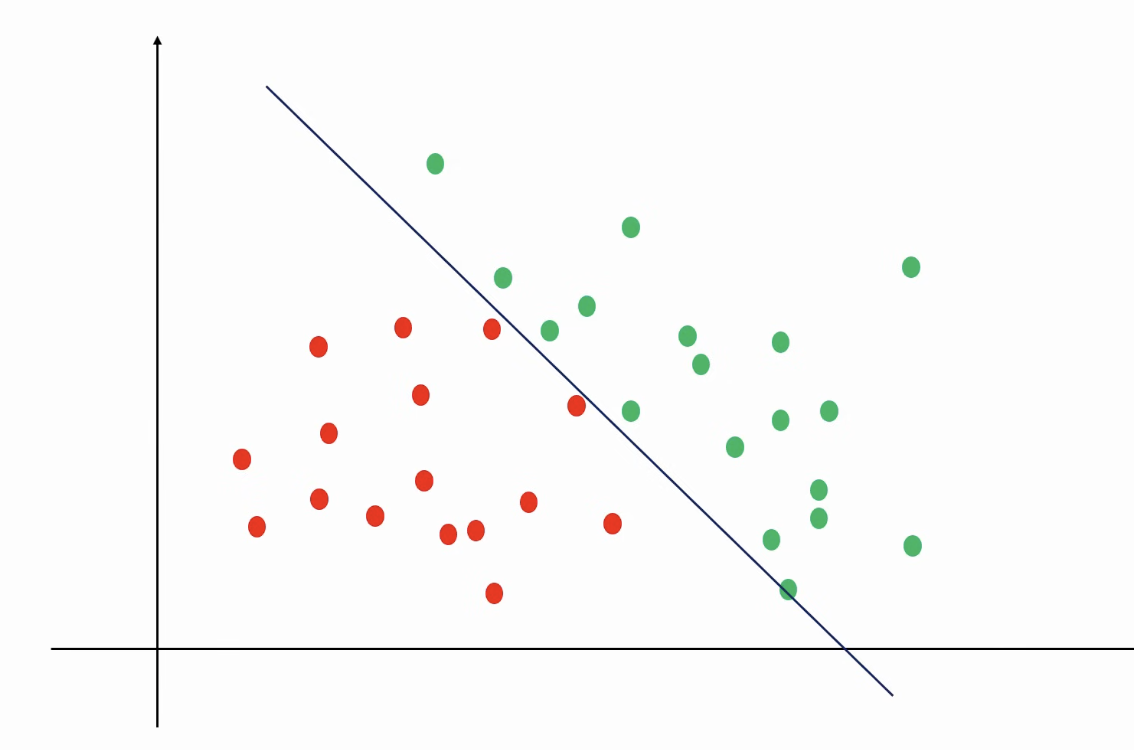

But when the data is not properly segregated, i.e., there is no single global boundary, but rather local segregation is present, we might have to create multiple boundaries.

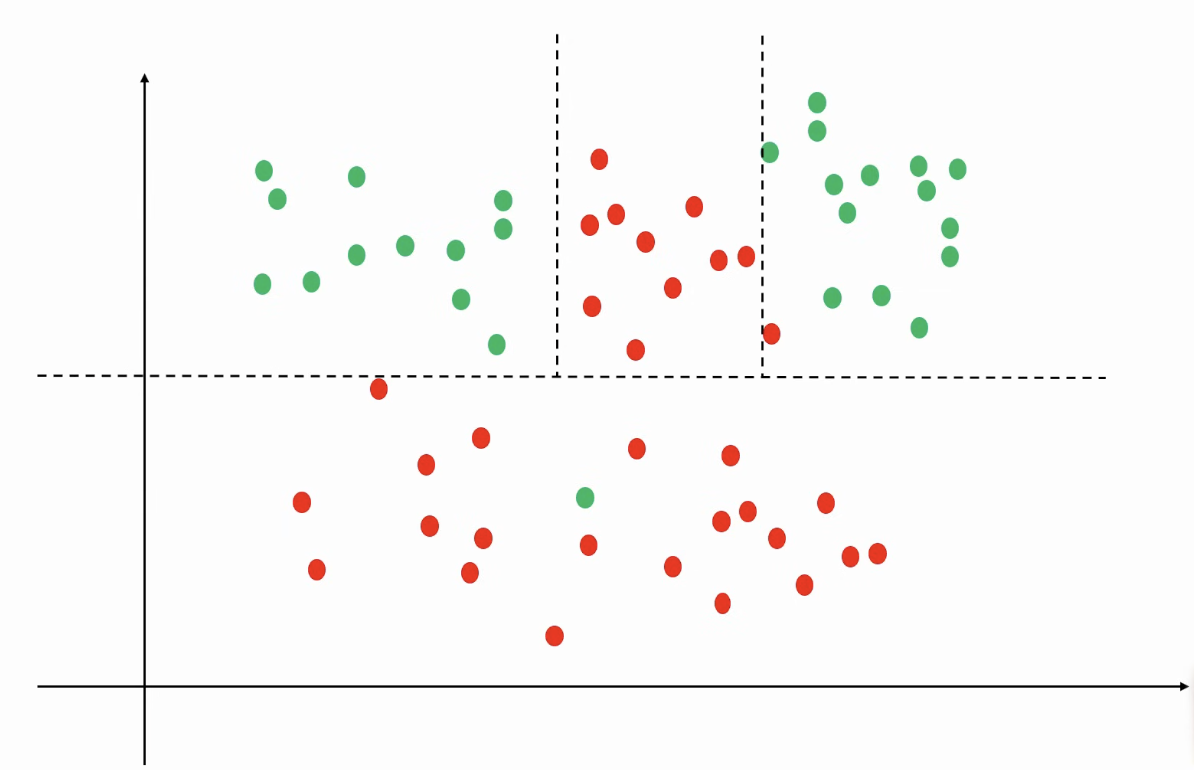

We will use decision trees to predict whether a person has a salary more than $100k or not for the following data:

In [107]:
import pandas as pd

df = pd.read_csv('salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


Dividing the dataset continuously in a tree like shape, we get the following structure:

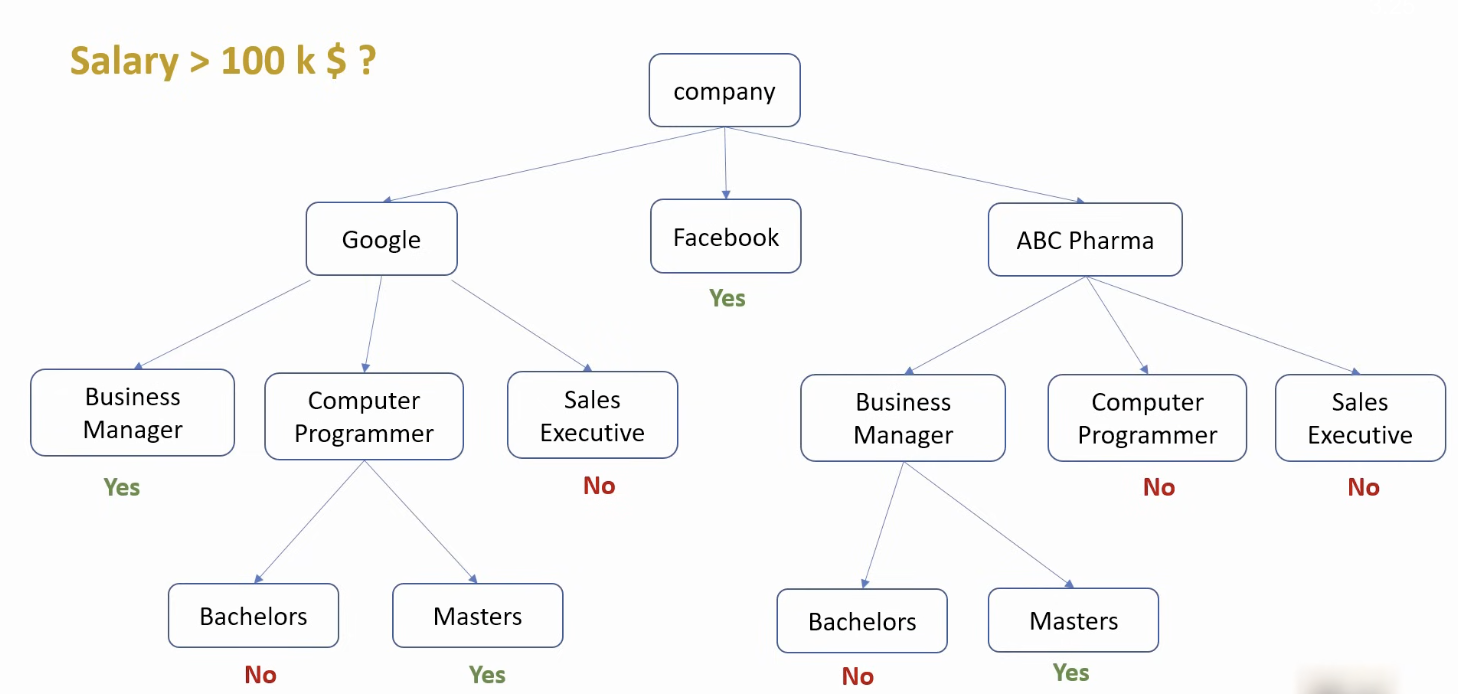

So the next natural question is, how do we decide the ordering of the features?
This is decide from the fact that each split should give us the lowest entropy and the highest information gain, which means that datapoints of similar nature should get divided efficiently.

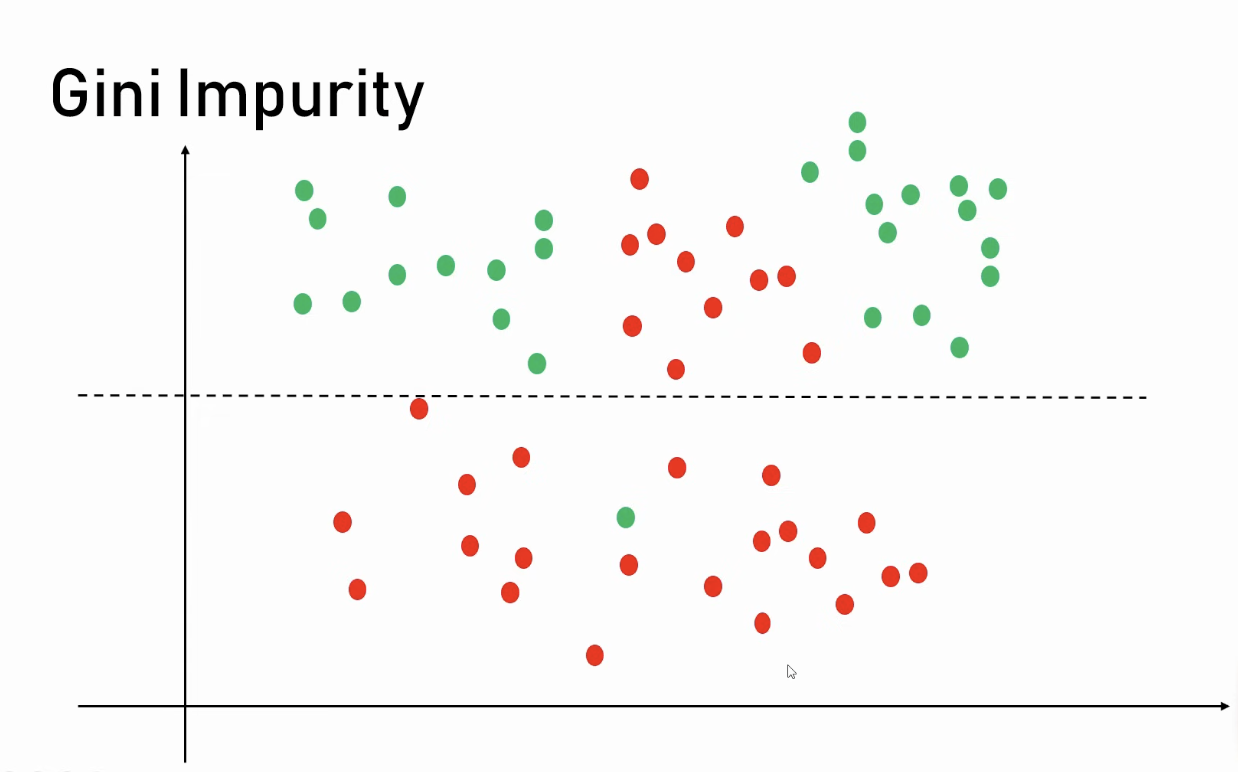

Gini-impurity is a similar concept to understand the entropy of the dataset.

In [108]:
inputs = df.drop('salary_more_then_100k', axis = 1)
target = df['salary_more_then_100k']

inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [109]:
# since we can't use texts to make preditions, we need to convert the labels into numeric data and we will do that using LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [110]:
# not we will drop the columns for which we have prepared the label encoders
inputs_n = inputs.drop(['company', 'job', 'degree'], axis = 1)
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [111]:
# now we can train our classifier
from sklearn import tree
from sklearn.model_selection import train_test_split as tts

# creating training-testing datasets
X_train, X_test, y_train, y_test = tts(inputs_n, target, test_size = 0.2)

# training
tee = tree.DecisionTreeClassifier()
tee.fit(X_train.values, y_train.values)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [112]:
# checking the performance of the model
# score of the model
print(tee.score(X_test.values, y_test.values))

# creating confusion matrix
from sklearn.metrics import confusion_matrix
y_predicted = tee.predict(X_test.values)
confm = confusion_matrix(y_predicted, y_test.values)
confm

0.75


array([[1, 0],
       [1, 2]])

In [113]:
# making predictions for random sample
tee.predict([[2,2,1]])

array([0])